# Import Libraries here

In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
sns.set(style="whitegrid", palette="deep", color_codes=True)

In [3]:
data = sqlite3.connect('../data/analysis.db')
df = pd.read_sql_query("SELECT * FROM US_Analysis", data)
df

,State,1990,2000,2005,2010,2015,2016,2017,2018,2019,...,tc_loss_ha_2019,tc_loss_ha_2021,gfw_forest_carbon_gross_emissions_2005__Mg_CO2e,gfw_forest_carbon_gross_emissions_2010__Mg_CO2e,gfw_forest_carbon_gross_emissions_2015__Mg_CO2e,gfw_forest_carbon_gross_emissions_2016__Mg_CO2e,gfw_forest_carbon_gross_emissions_2017__Mg_CO2e,gfw_forest_carbon_gross_emissions_2018__Mg_CO2e,gfw_forest_carbon_gross_emissions_2019__Mg_CO2e,gfw_forest_carbon_gross_emissions_2021__Mg_CO2e
0,Alaska,87600.0,84100.0,78200.0,80400.0,83900.0,86300.0,80900.0,80200.0,80000.0,...,519846,68776,80601209.0,52559677.0,68203533.0,24281327.0,31235072.0,13307678.0,84867003.0,8589369.0
1,Alaska,87600.0,84100.0,78200.0,80400.0,83900.0,86300.0,80900.0,80200.0,80000.0,...,519846,68776,66638841.0,44999392.0,51306614.0,19475103.0,13627816.0,8611501.0,61970967.0,7139302.0
2,Alaska,87600.0,84100.0,78200.0,80400.0,83900.0,86300.0,80900.0,80200.0,80000.0,...,519846,68776,32978791.0,31999441.0,17643845.0,9078920.0,5494405.0,4556410.0,24958886.0,4939610.0
3,Alaska,87600.0,84100.0,78200.0,80400.0,83900.0,86300.0,80900.0,80200.0,80000.0,...,474400,64432,80601209.0,52559677.0,68203533.0,24281327.0,31235072.0,13307678.0,84867003.0,8589369.0
4,Alaska,87600.0,84100.0,78200.0,80400.0,83900.0,86300.0,80900.0,80200.0,80000.0,...,474400,64432,66638841.0,44999392.0,51306614.0,19475103.0,13627816.0,8611501.0,61970967.0,7139302.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,West Virginia,44000.0,48400.0,46500.0,47600.0,48100.0,49000.0,48000.0,47600.0,51800.0,...,13614,11210,4395923.0,3808134.0,5175532.0,6629154.0,7411874.0,5513623.0,5586301.0,4701778.0
596,West Virginia,44000.0,48400.0,46500.0,47600.0,48100.0,49000.0,48000.0,47600.0,51800.0,...,13614,11210,4311473.0,3760839.0,5053082.0,6472369.0,7213044.0,5408502.0,5456105.0,4580390.0
597,West Virginia,44000.0,48400.0,46500.0,47600.0,48100.0,49000.0,48000.0,47600.0,51800.0,...,13132,10773,4413060.0,3815884.0,5206970.0,6671630.0,7470756.0,5544370.0,5623781.0,4730260.0
598,West Virginia,44000.0,48400.0,46500.0,47600.0,48100.0,49000.0,48000.0,47600.0,51800.0,...,13132,10773,4395923.0,3808134.0,5175532.0,6629154.0,7411874.0,5513623.0,5586301.0,4701778.0


# Exploratory Data Analysis

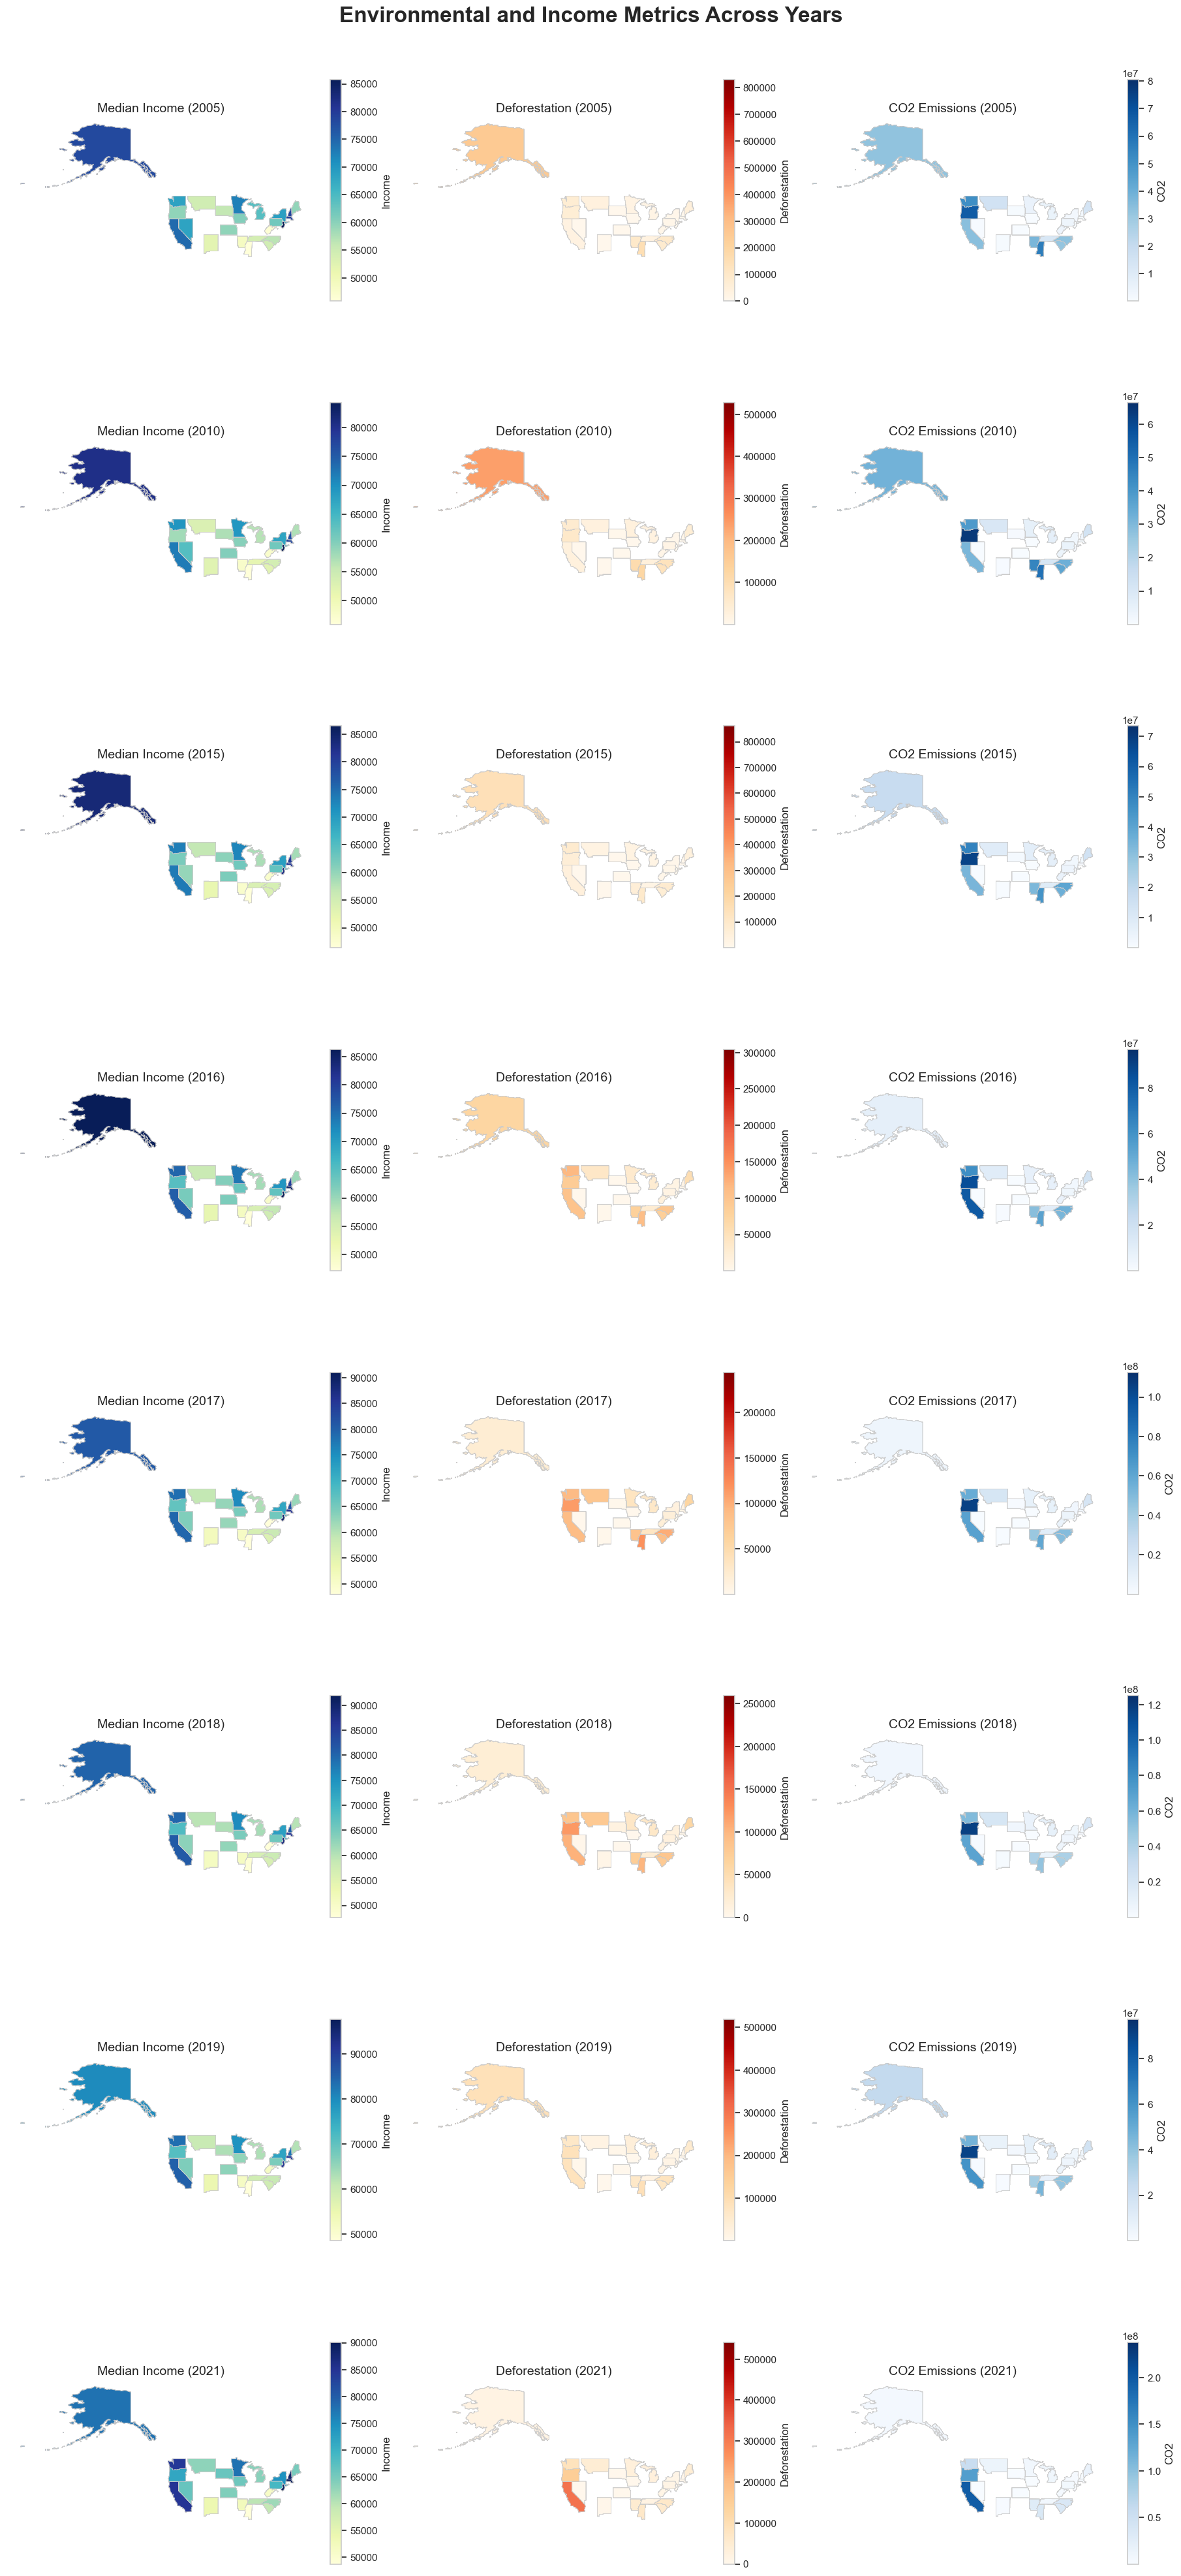

In [ ]:
import math
import geopandas as gpd
import matplotlib.pyplot as plt

# Load U.S. states boundaries from an online GeoJSON file
us_states_url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"
us_states = gpd.read_file(us_states_url)

def plot_all_environmental_maps(years, df, us_states):
    num_metrics = 3  # Income, Deforestation, CO2
    rows = len(years)
    cols = num_metrics

    fig, axes = plt.subplots(
        rows, cols, figsize=(cols * 6, rows * 5), constrained_layout=True
    )
    fig.suptitle('Environmental and Income Metrics Across Years', fontsize=24, weight='bold')

    for i, year in enumerate(years):
        # Prepare the data for the current year
        data_year = df[['State', year, f'tc_loss_ha_{year}', f'gfw_forest_carbon_gross_emissions_{year}__Mg_CO2e']]
        data_year.columns = ['State', f'Income_{year}', f'Deforestation_{year}', f'CO2_{year}']
        
        # Merge US states GeoDataFrame with the income and environmental data
        geo_data = us_states.merge(data_year, how="left", left_on="name", right_on="State")

        # Plot each metric
        for j, (metric, cmap, title) in enumerate([
            (f'Income_{year}', 'YlGnBu', f'Median Income ({year})'),
            (f'Deforestation_{year}', 'OrRd', f'Deforestation ({year})'),
            (f'CO2_{year}', 'Blues', f'CO2 Emissions ({year})')
        ]):
            ax = axes[i, j] if rows > 1 else axes[j]
            geo_data.plot(
                column=metric, cmap=cmap, linewidth=0.5, ax=ax,
                edgecolor='0.8', legend=True,
                legend_kwds={'shrink': 0.7, 'label': metric.split('_')[0]}
            )
            ax.set_title(title, fontsize=14)
            ax.axis('off')

    # Save the figure for EDA purposes
    plt.savefig('environmental_metrics_eda.png', dpi=300)
    plt.show()

# Example usage: Generate maps for multiple years
years = ['2005', '2010', '2015', '2016', '2017', '2018', '2019', '2021']
plot_all_environmental_maps(years, df, us_states)


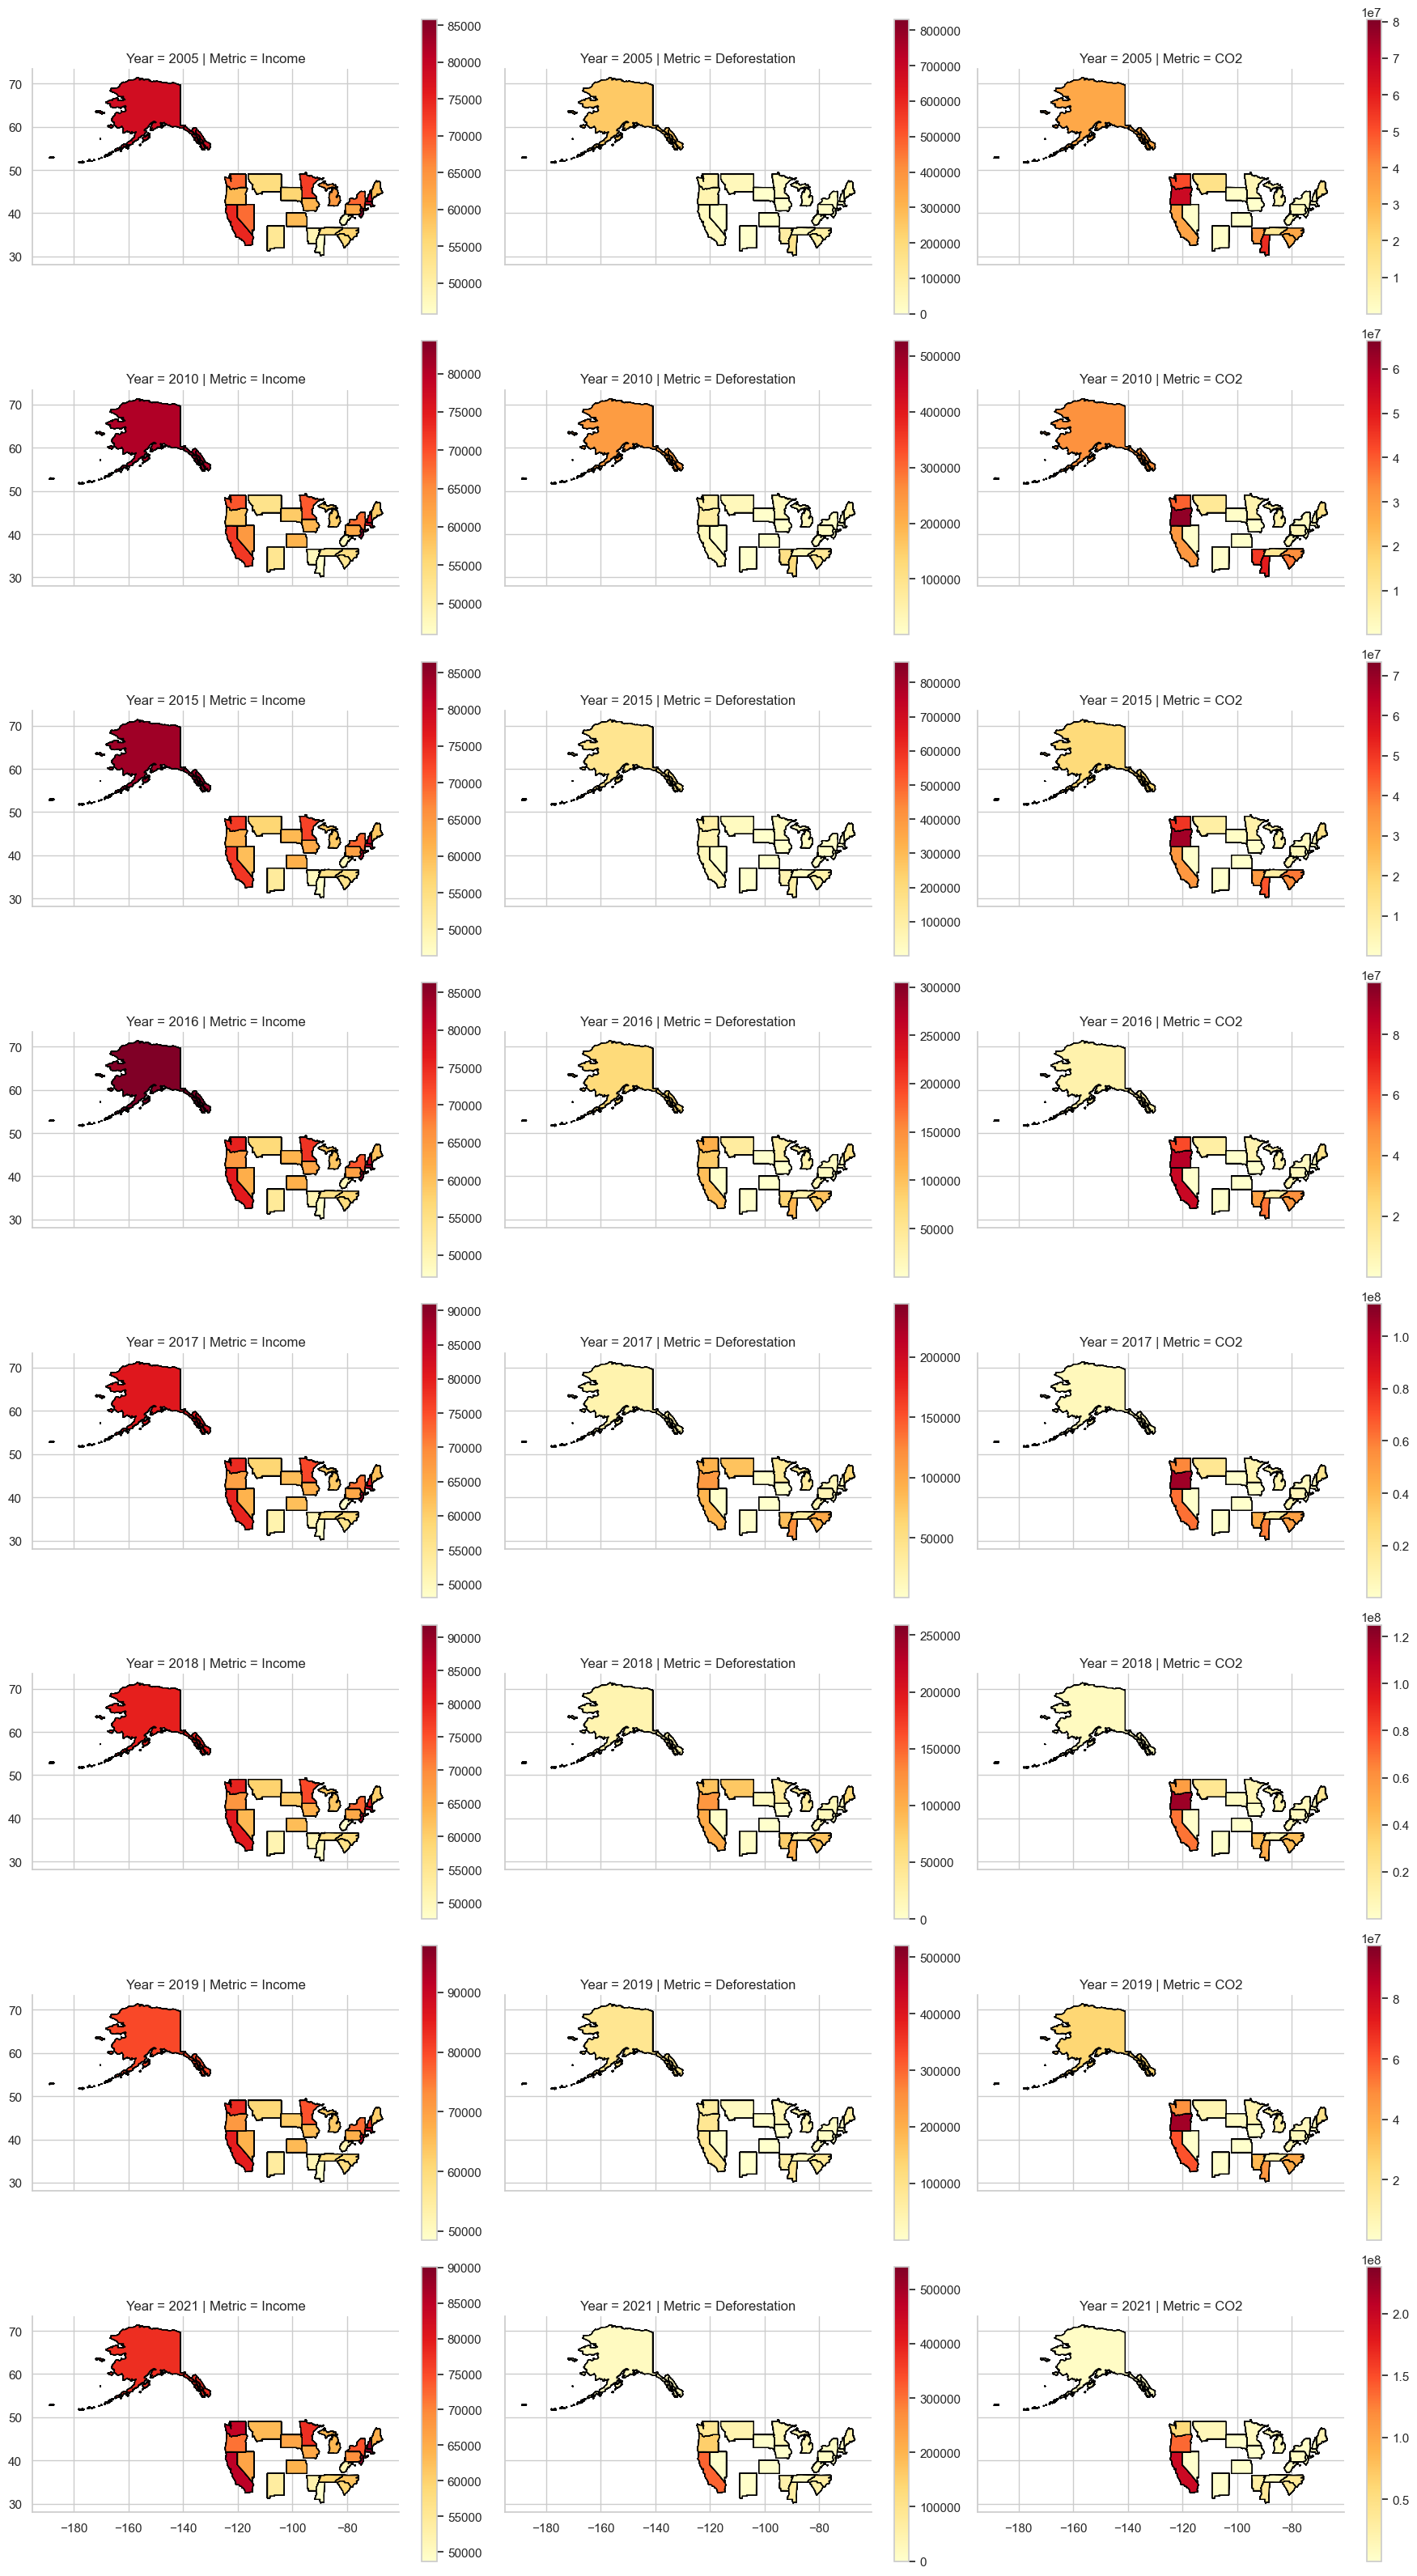

In [11]:
import seaborn as sns
import pandas as pd

def plot_environmental_maps_facetgrid(years, df, us_states):
    # Prepare long-form data for FacetGrid
    data_long = []
    for year in years:
        temp = df[['State', year, f'tc_loss_ha_{year}', f'gfw_forest_carbon_gross_emissions_{year}__Mg_CO2e']]
        temp.columns = ['State', f'Income_{year}', f'Deforestation_{year}', f'CO2_{year}']
        for metric in [f'Income_{year}', f'Deforestation_{year}', f'CO2_{year}']:
            metric_name = metric.split('_')[0]
            temp_metric = temp[['State', metric]].rename(columns={metric: 'Value'})
            temp_metric['Metric'] = metric_name
            temp_metric['Year'] = year
            data_long.append(temp_metric)

    long_df = pd.concat(data_long, ignore_index=True)

    # Merge with geo data
    geo_data = us_states.merge(long_df, how="left", left_on="name", right_on="State")

    # Use FacetGrid to plot multiple maps
    g = sns.FacetGrid(geo_data, col="Metric", row="Year", aspect=1.5, height=4)
    g.map_dataframe(
        lambda data, color, **kwargs: data.plot(
            column='Value', ax=plt.gca(), legend=True, cmap='YlOrRd', edgecolor='black'
        )
    )
    plt.show()

plot_environmental_maps_facetgrid(years, df, us_states)


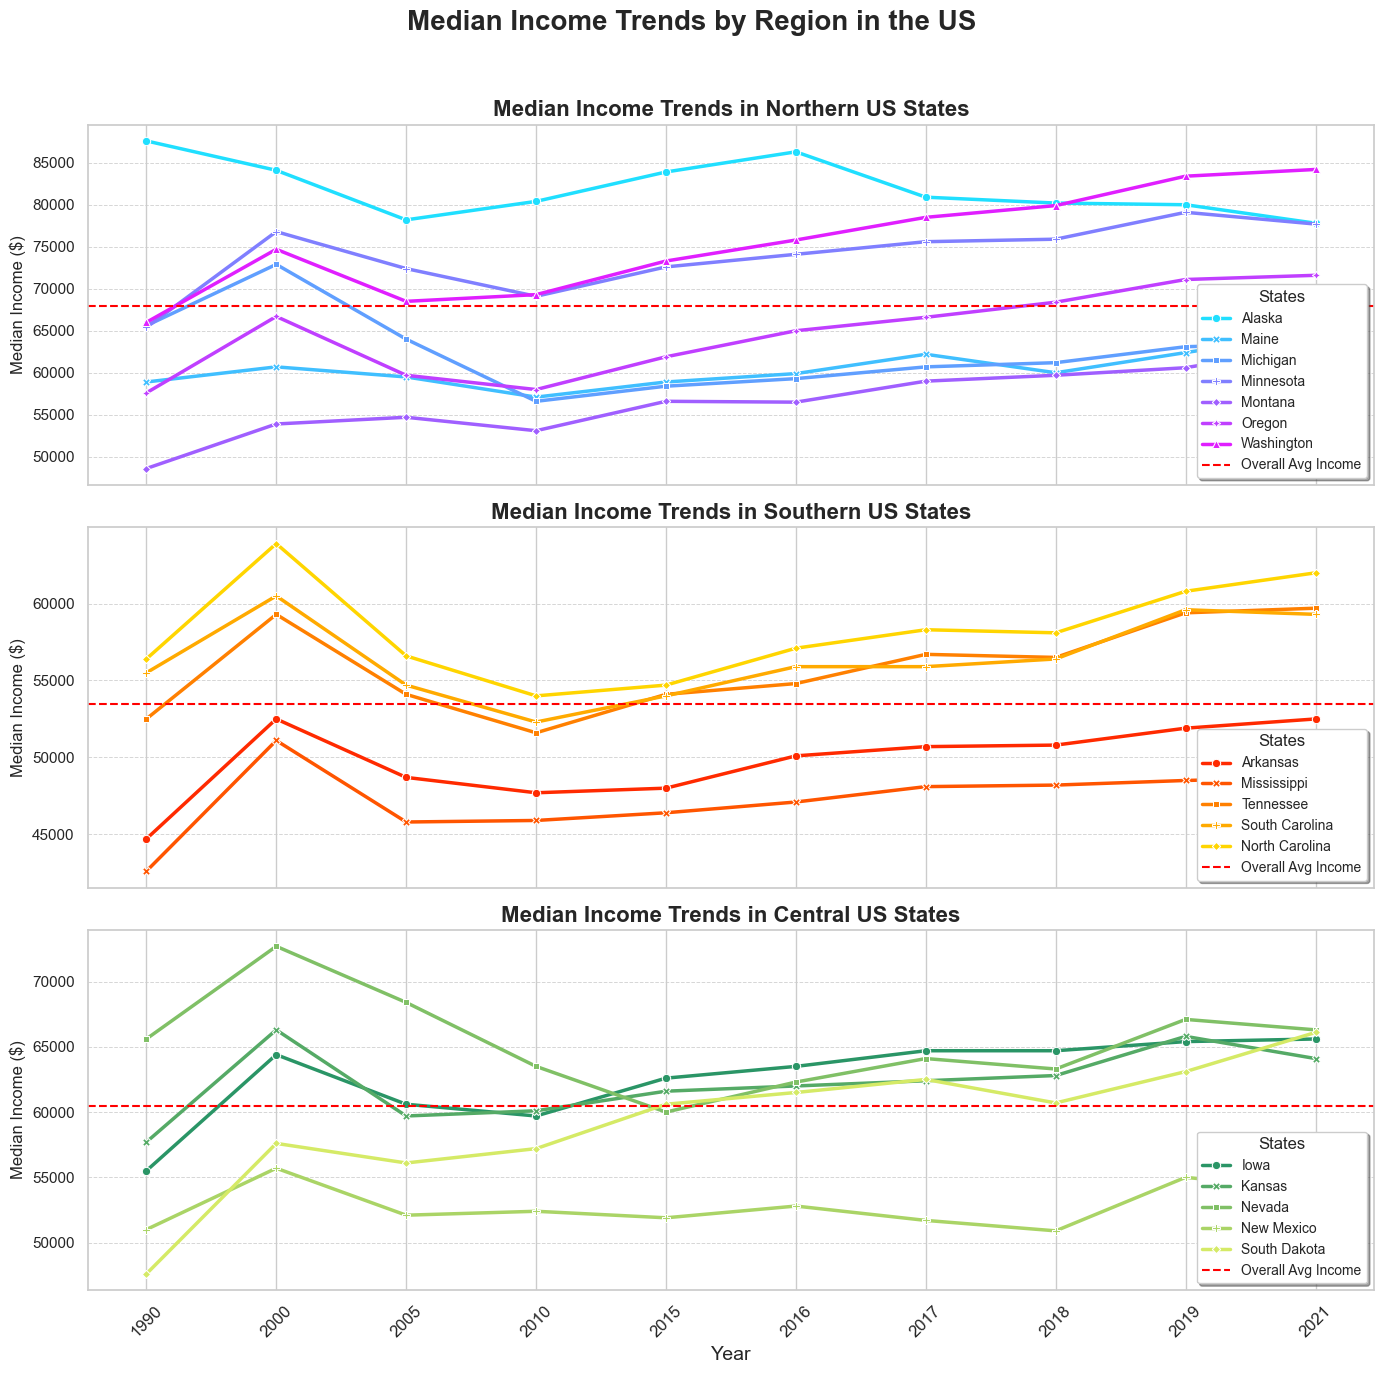

In [25]:
# Update state groupings based on available states
north_states = ['Alaska', 'Maine', 'Michigan', 'Minnesota', 'Montana', 'Oregon', 'Washington']
south_states = ['Arkansas', 'Mississippi', 'Tennessee', 'South Carolina', 'North Carolina']
central_states = ['Iowa', 'Kansas', 'Nevada', 'New Mexico', 'South Dakota']

income_years = [col for col in df.columns if col.isdigit()]
income_data = df[['State'] + income_years].groupby('State').mean().T

# Splitting income data into regions
north_data = income_data[north_states].dropna(axis=1, how='all')
south_data = income_data[south_states].dropna(axis=1, how='all')
central_data = income_data[central_states].dropna(axis=1, how='all')

fig, axes = plt.subplots(3, 1, figsize=(14, 14), sharex=True)

# Plot North
sns.lineplot(data=north_data, ax=axes[0], linewidth=2.5, palette="cool", markers=True, dashes=False)
axes[0].set_title("Median Income Trends in Northern US States", fontsize=16, fontweight='bold')
axes[0].axhline(north_data.mean(axis=1).mean(), color='red', linestyle='--', linewidth=1.5, label='Overall Avg Income')
axes[0].legend(fontsize=10, title="States", frameon=True, shadow=True)
axes[0].set_ylabel("Median Income ($)", fontsize=12)
axes[0].grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.8)

# Plot South
sns.lineplot(data=south_data, ax=axes[1], linewidth=2.5, palette="autumn", markers=True, dashes=False)
axes[1].set_title("Median Income Trends in Southern US States", fontsize=16, fontweight='bold')
axes[1].axhline(south_data.mean(axis=1).mean(), color='red', linestyle='--', linewidth=1.5, label='Overall Avg Income')
axes[1].legend(fontsize=10, title="States", frameon=True, shadow=True)
axes[1].set_ylabel("Median Income ($)", fontsize=12)
axes[1].grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.8)

# Plot Central
sns.lineplot(data=central_data, ax=axes[2], linewidth=2.5, palette="summer", markers=True, dashes=False)
axes[2].set_title("Median Income Trends in Central US States", fontsize=16, fontweight='bold')
axes[2].axhline(central_data.mean(axis=1).mean(), color='red', linestyle='--', linewidth=1.5, label='Overall Avg Income')
axes[2].legend(fontsize=10, title="States", frameon=True, shadow=True)
axes[2].set_xlabel("Year", fontsize=14)
axes[2].set_ylabel("Median Income ($)", fontsize=12)
axes[2].grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.8)

plt.xticks(rotation=45, fontsize=12)
plt.suptitle("Median Income Trends by Region in the US", fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()


# Correlation Analysis

In [ ]:
selected_columns = [
    'State', '2005', '2010', '2015', '2016', '2017', '2018', '2019', '2021', # Income columns
    'tc_loss_ha_2005', 'tc_loss_ha_2010', 'tc_loss_ha_2015', 
    'tc_loss_ha_2016', 'tc_loss_ha_2017', 'tc_loss_ha_2018', 'tc_loss_ha_2019', 'tc_loss_ha_2021',  # Deforestation columns
    'gfw_forest_carbon_gross_emissions_2005__Mg_CO2e', 'gfw_forest_carbon_gross_emissions_2010__Mg_CO2e', 
    'gfw_forest_carbon_gross_emissions_2015__Mg_CO2e', 'gfw_forest_carbon_gross_emissions_2016__Mg_CO2e', 
    'gfw_forest_carbon_gross_emissions_2017__Mg_CO2e', 'gfw_forest_carbon_gross_emissions_2018__Mg_CO2e', 
    'gfw_forest_carbon_gross_emissions_2019__Mg_CO2e', 'gfw_forest_carbon_gross_emissions_2021__Mg_CO2e'
 ] # CO₂ emissions columns 
filtered_df = df[selected_columns].drop_duplicates()

# Calculate correlations and conduct Pearson tests for income vs. deforestation and income vs. CO₂
correlations = {}
tests = {}
for year in ['2005', '2010', '2015', '2016', '2017', '2018', '2019', '2021']:
    # Correlations
    correlations[year] = {
        'Income-Deforestation': filtered_df[year].corr(filtered_df[f'tc_loss_ha_{year}']),
        'Income-CO2': filtered_df[year].corr(filtered_df[f'gfw_forest_carbon_gross_emissions_{year}__Mg_CO2e'])
    }
    
    # Pearson Correlation Tests
    tests[year] = {
        'Income-Deforestation': pearsonr(filtered_df[year], filtered_df[f'tc_loss_ha_{year}']),
        'Income-CO2': pearsonr(filtered_df[year], filtered_df[f'gfw_forest_carbon_gross_emissions_{year}__Mg_CO2e'])
    }

# Display Results
print("Correlation Analysis Results:")
for year, result in correlations.items():
    print(f"\nYear: {year}")
    print(f"Income-Deforestation Correlation: {result['Income-Deforestation']:.3f}")
    print(f"Income-CO2 Correlation: {result['Income-CO2']:.3f}")

print("\nPearson Correlation Test Results:")
for year, result in tests.items():
    print(f"\nYear: {year}")
    print(f"Income-Deforestation Correlation: {result['Income-Deforestation'][0]:.3f}, P-value: {result['Income-Deforestation'][1]:.5f}")
    print(f"Income-CO2 Correlation: {result['Income-CO2'][0]:.3f}, P-value: {result['Income-CO2'][1]:.5f}")


Correlation Analysis Results:

Year: 2005
Income-Deforestation Correlation: 0.133
Income-CO2 Correlation: -0.156

Year: 2010
Income-Deforestation Correlation: 0.136
Income-CO2 Correlation: -0.217

Year: 2015
Income-Deforestation Correlation: 0.246
Income-CO2 Correlation: -0.109

Year: 2016
Income-Deforestation Correlation: 0.077
Income-CO2 Correlation: -0.100

Year: 2017
Income-Deforestation Correlation: -0.128
Income-CO2 Correlation: -0.143

Year: 2018
Income-Deforestation Correlation: -0.053
Income-CO2 Correlation: -0.056

Year: 2019
Income-Deforestation Correlation: 0.071
Income-CO2 Correlation: -0.004

Year: 2021
Income-Deforestation Correlation: 0.180
Income-CO2 Correlation: 0.170

Pearson Correlation Test Results:

Year: 2005
Income-Deforestation Correlation: 0.133, P-value: 0.00118
Income-CO2 Correlation: -0.156, P-value: 0.00014

Year: 2010
Income-Deforestation Correlation: 0.136, P-value: 0.00089
Income-CO2 Correlation: -0.217, P-value: 0.00000

Year: 2015
Income-Deforestation

In [13]:
plot_data = {
    "Year": ['2005', '2010', '2015', '2016', '2017', '2018', '2019', '2021'],
    "Income-Deforestation Correlation": [0.133, 0.136, 0.246, 0.077, -0.128, -0.053, 0.071, 0.180],
    "Income-CO2 Correlation": [-0.156, -0.217, -0.109, -0.100, -0.143, -0.056, -0.004, 0.170],
    "Deforestation P-value": [0.00118, 0.00089, 0.00000, 0.05974, 0.00182, 0.19568, 0.08613, 0.00001],
    "CO2 P-value": [0.00014, 0.00000, 0.00790, 0.01453, 0.00049, 0.17723, 0.93187, 0.00003]
}
plot_df = pd.DataFrame(plot_data)

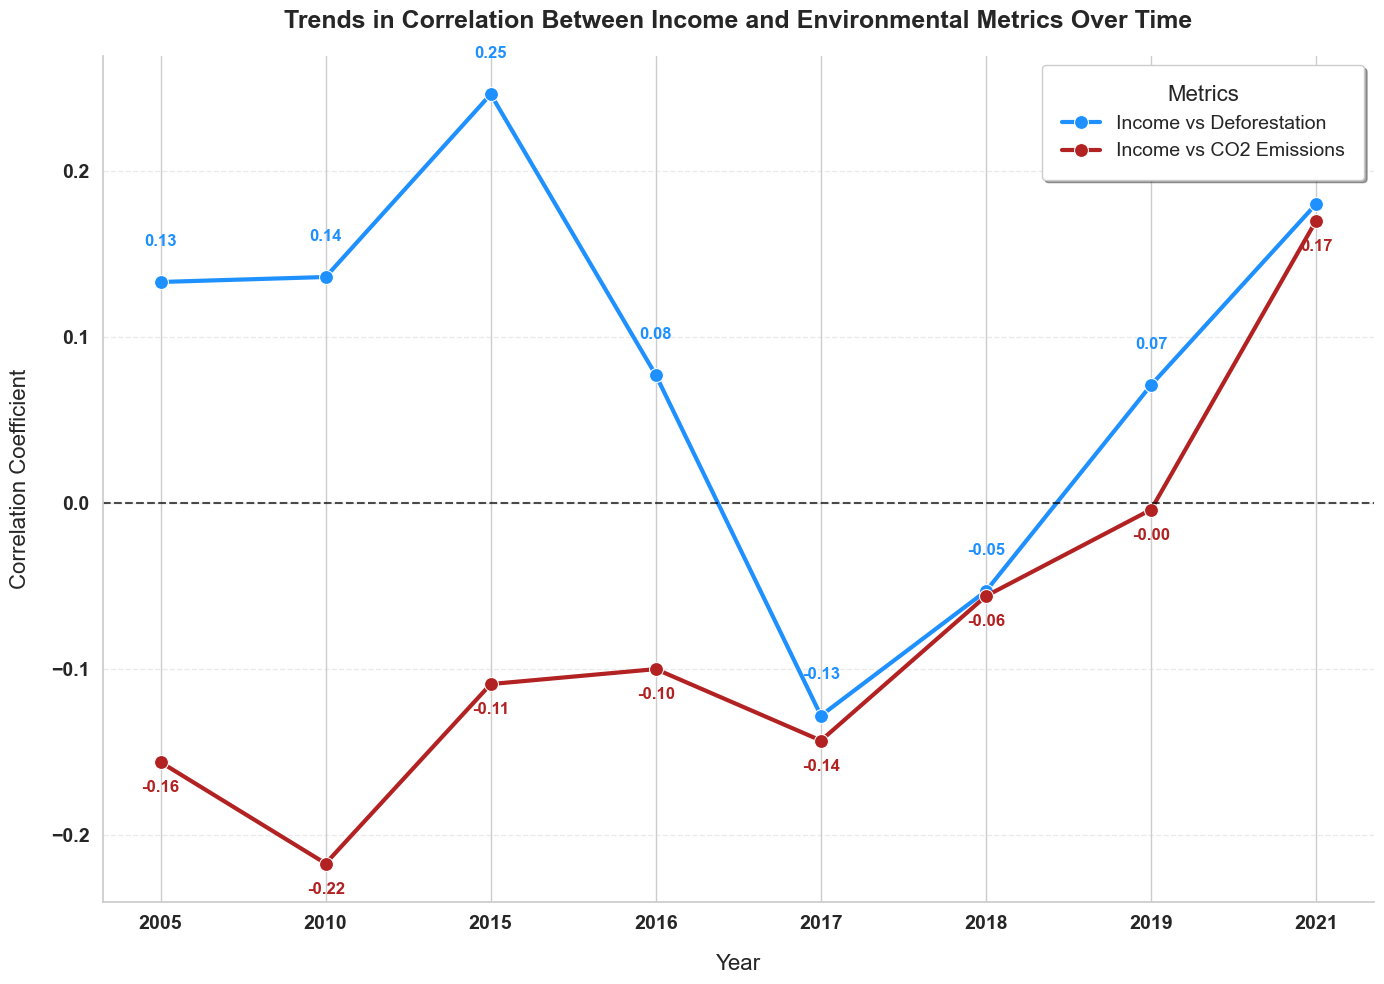

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Enhanced Beautification of Line Plot with Seaborn
plt.figure(figsize=(14, 10))
sns.set_theme(style="whitegrid")

# Plot Income-Deforestation Correlation
sns.lineplot(
    x='Year', y='Income-Deforestation Correlation', data=plot_df,
    marker='o', label='Income vs Deforestation', color='dodgerblue', linewidth=3, markersize=10
)

# Plot Income-CO2 Correlation
sns.lineplot(
    x='Year', y='Income-CO2 Correlation', data=plot_df,
    marker='o', label='Income vs CO2 Emissions', color='firebrick', linewidth=3, markersize=10
)

# Customize aesthetics
plt.title(
    'Trends in Correlation Between Income and Environmental Metrics Over Time',
    fontsize=18, weight='bold', pad=20
)
plt.ylabel('Correlation Coefficient', fontsize=16, labelpad=15)
plt.xlabel('Year', fontsize=16, labelpad=15)
plt.axhline(0, color='black', linewidth=1.5, linestyle='--', alpha=0.7)
plt.legend(
    fontsize=14, title="Metrics", title_fontsize=16, loc='upper right', frameon=True, shadow=True, borderpad=1
)
plt.xticks(fontsize=14, weight='bold')
plt.yticks(fontsize=14, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.4)
sns.despine()

# Add annotations above the lines
for i, row in plot_df.iterrows():
    # Annotate Income-Deforestation Correlation
    plt.text(
        row['Year'], row['Income-Deforestation Correlation'] + 0.02,  # Adjusted position above the line
        f"{row['Income-Deforestation Correlation']:.2f}",
        color='dodgerblue', fontsize=12, ha='center', va='bottom', weight='bold'
    )
    # Annotate Income-CO2 Correlation
    plt.text(
        row['Year'], row['Income-CO2 Correlation'] - 0.02,  # Adjusted position above the line
        f"{row['Income-CO2 Correlation']:.2f}",
        color='firebrick', fontsize=12, ha='center', va='bottom', weight='bold'
    )

# Show the plot
plt.tight_layout()
plt.show()


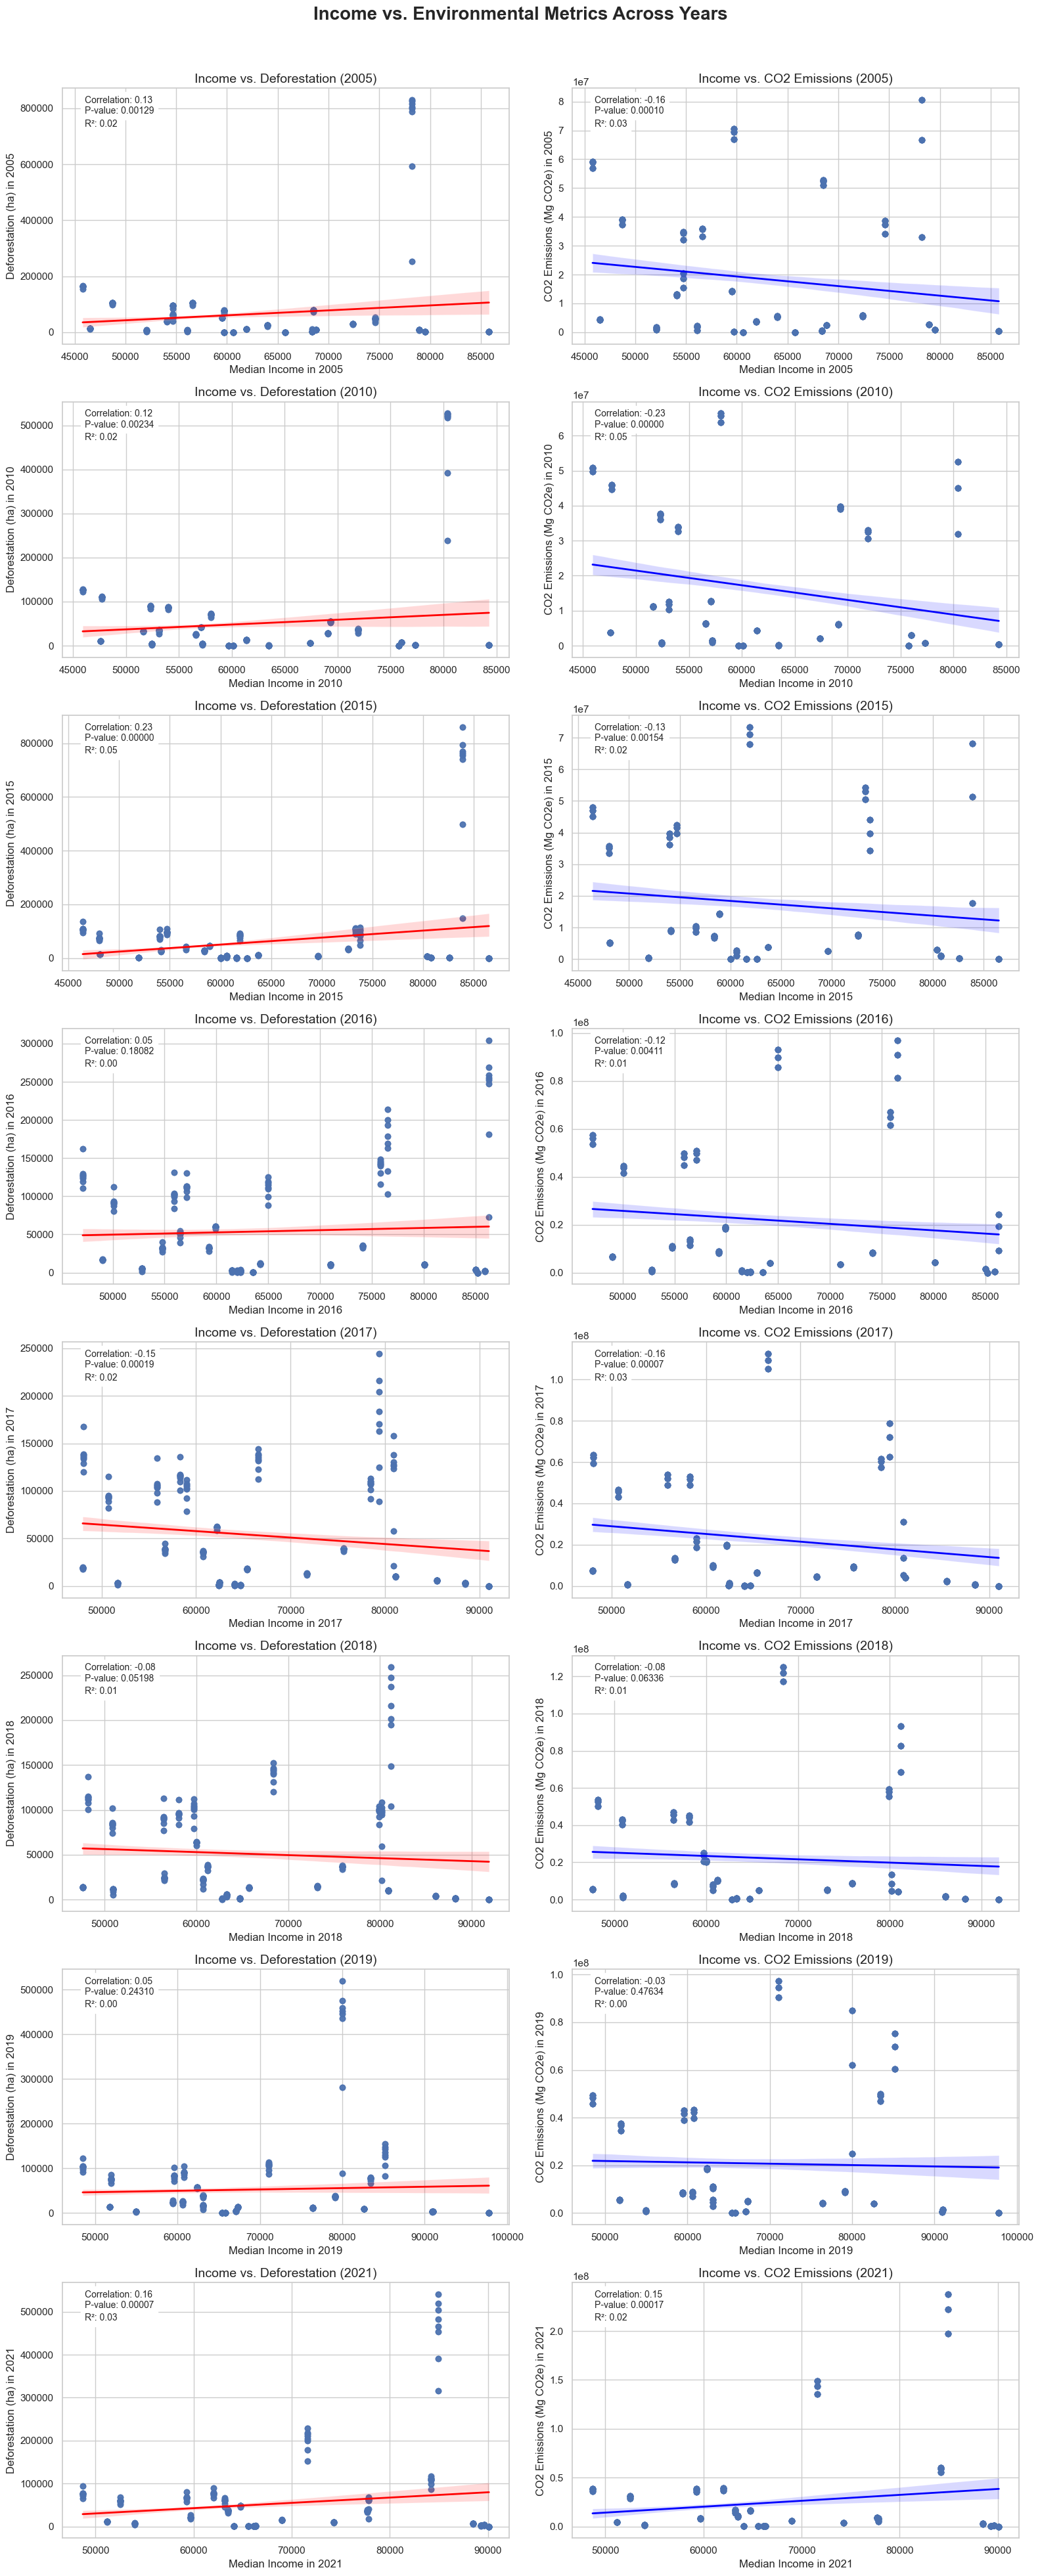

In [19]:
# Define the years again since they are undefined in this context
years = ['2005', '2010', '2015', '2016', '2017', '2018', '2019', '2021']

# Filter columns on year
filtered_df = df[['State'] + years + 
                   [f'tc_loss_ha_{year}' for year in years] + 
                   [f'gfw_forest_carbon_gross_emissions_{year}__Mg_CO2e' for year in years]].dropna()

fig, axes = plt.subplots(len(years), 2, figsize=(16, len(years) * 5))

for idx, year in enumerate(years):
    # Scatter plot for Income vs Deforestation
    sns.regplot(
        x=filtered_df[year], 
        y=filtered_df[f'tc_loss_ha_{year}'], 
        ax=axes[idx, 0], 
        scatter_kws={'alpha': 0.6}, 
        line_kws={'color': 'red', 'lw': 2}
    )
    axes[idx, 0].set_xlabel(f'Median Income in {year}', fontsize=12)
    axes[idx, 0].set_ylabel(f'Deforestation (ha) in {year}', fontsize=12)
    axes[idx, 0].set_title(f'Income vs. Deforestation ({year})', fontsize=14)
    corr_income_deforestation, p_value_deforestation = pearsonr(
        filtered_df[year], 
        filtered_df[f'tc_loss_ha_{year}']
    )
    axes[idx, 0].annotate(
        f"Correlation: {corr_income_deforestation:.2f}\nP-value: {p_value_deforestation:.5f}", 
        xy=(0.05, 0.9), xycoords="axes fraction", fontsize=10, backgroundcolor="white"
    )
    # Regression analysis for Income vs. Deforestation
    X_deforestation = sm.add_constant(filtered_df[year])  # Add constant for intercept
    y_deforestation = filtered_df[f'tc_loss_ha_{year}']
    model_deforestation = sm.OLS(y_deforestation, X_deforestation).fit()
    r_squared_deforestation = model_deforestation.rsquared
    axes[idx, 0].annotate(
        f"R²: {r_squared_deforestation:.2f}", 
        xy=(0.05, 0.85), xycoords="axes fraction", fontsize=10, backgroundcolor="white"
    )

    # Scatter plot for Income vs CO2
    sns.regplot(
        x=filtered_df[year], 
        y=filtered_df[f'gfw_forest_carbon_gross_emissions_{year}__Mg_CO2e'], 
        ax=axes[idx, 1], 
        scatter_kws={'alpha': 0.6}, 
        line_kws={'color': 'blue', 'lw': 2}
    )
    axes[idx, 1].set_xlabel(f'Median Income in {year}', fontsize=12)
    axes[idx, 1].set_ylabel(f'CO2 Emissions (Mg CO2e) in {year}', fontsize=12)
    axes[idx, 1].set_title(f'Income vs. CO2 Emissions ({year})', fontsize=14)
    corr_income_co2, p_value_co2 = pearsonr(
        filtered_df[year], 
        filtered_df[f'gfw_forest_carbon_gross_emissions_{year}__Mg_CO2e']
    )
    axes[idx, 1].annotate(
        f"Correlation: {corr_income_co2:.2f}\nP-value: {p_value_co2:.5f}", 
        xy=(0.05, 0.9), xycoords="axes fraction", fontsize=10, backgroundcolor="white"
    )
# Regression analysis for Income vs. CO2
    X_co2 = sm.add_constant(filtered_df[year])  # Add constant for intercept
    y_co2 = filtered_df[f'gfw_forest_carbon_gross_emissions_{year}__Mg_CO2e']
    model_co2 = sm.OLS(y_co2, X_co2).fit()
    r_squared_co2 = model_co2.rsquared
    axes[idx, 1].annotate(
        f"R²: {r_squared_co2:.2f}", 
        xy=(0.05, 0.85), xycoords="axes fraction", fontsize=10, backgroundcolor="white"
    )

fig.suptitle("Income vs. Environmental Metrics Across Years", fontsize=20, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.97])  
plt.show()


In [ ]:
# Reduce batch size further to 2 years per figure for optimization
batch_size = 2
batches = [years[i:i + batch_size] for i in range(0, len(years), batch_size)]

for batch_idx, batch_years in enumerate(batches):
    # Create a figure for the batch
    fig, axes = plt.subplots(len(batch_years), 2, figsize=(16, len(batch_years) * 6))
    
    for idx, year in enumerate(batch_years):
        # Scatter plot for Income vs. Deforestation
        sns.regplot(
            x=filtered_df[year], 
            y=filtered_df[f'tc_loss_ha_{year}'], 
            ax=axes[idx, 0], 
            scatter_kws={'alpha': 0.6}, 
            line_kws={'color': 'red', 'lw': 2}
        )
        axes[idx, 0].set_xlabel(f'Median Income in {year}', fontsize=12)
        axes[idx, 0].set_ylabel(f'Deforestation (ha) in {year}', fontsize=12)
        axes[idx, 0].set_title(f'Income vs. Deforestation ({year})', fontsize=14)
        
        # Regression analysis for Income vs. Deforestation
        X_deforestation = sm.add_constant(filtered_df[year])  # Add constant for intercept
        y_deforestation = filtered_df[f'tc_loss_ha_{year}']
        model_deforestation = sm.OLS(y_deforestation, X_deforestation).fit()
        r_squared_deforestation = model_deforestation.rsquared
        axes[idx, 0].annotate(
            f"R²: {r_squared_deforestation:.2f}", 
            xy=(0.05, 0.85), xycoords="axes fraction", fontsize=10, backgroundcolor="white"
        )

        # Scatter plot for Income vs. CO2
        sns.regplot(
            x=filtered_df[year], 
            y=filtered_df[f'gfw_forest_carbon_gross_emissions_{year}__Mg_CO2e'], 
            ax=axes[idx, 1], 
            scatter_kws={'alpha': 0.6}, 
            line_kws={'color': 'blue', 'lw': 2}
        )
        axes[idx, 1].set_xlabel(f'Median Income in {year}', fontsize=12)
        axes[idx, 1].set_ylabel(f'CO2 Emissions (Mg CO2e) in {year}', fontsize=12)
        axes[idx, 1].set_title(f'Income vs. CO2 Emissions ({year})', fontsize=14)
        
        # Regression analysis for Income vs. CO2
        X_co2 = sm.add_constant(filtered_df[year])  # Add constant for intercept
        y_co2 = filtered_df[f'gfw_forest_carbon_gross_emissions_{year}__Mg_CO2e']
        model_co2 = sm.OLS(y_co2, X_co2).fit()
        r_squared_co2 = model_co2.rsquared
        axes[idx, 1].annotate(
            f"R²: {r_squared_co2:.2f}", 
            xy=(0.05, 0.85), xycoords="axes fraction", fontsize=10, backgroundcolor="white"
        )
    
    # Adjust layout for clarity
    fig.suptitle(f"Income vs. Environmental Metrics (Batch {batch_idx + 1})", fontsize=20, fontweight="bold")
    plt.tight_layout(rect=[0, 0, 1, 0.97])  # Add space for the main title
    plt.show()


# Average Income Vs Enviournment Metrics Analysis

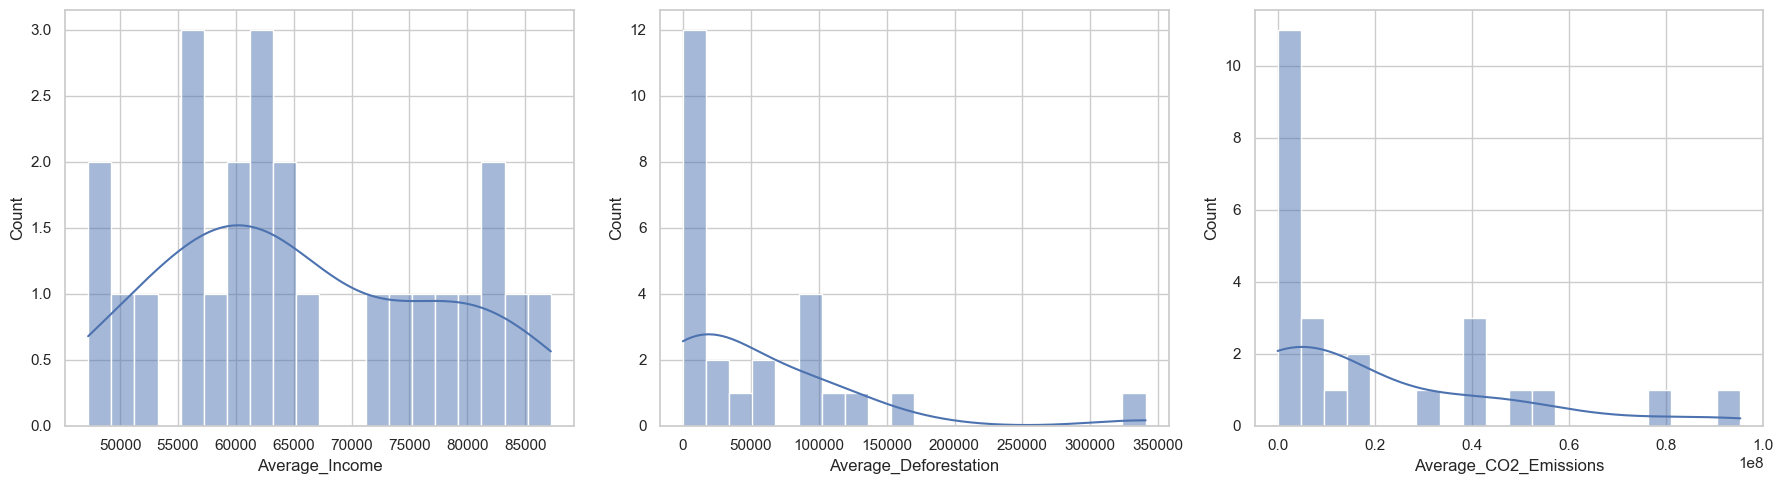

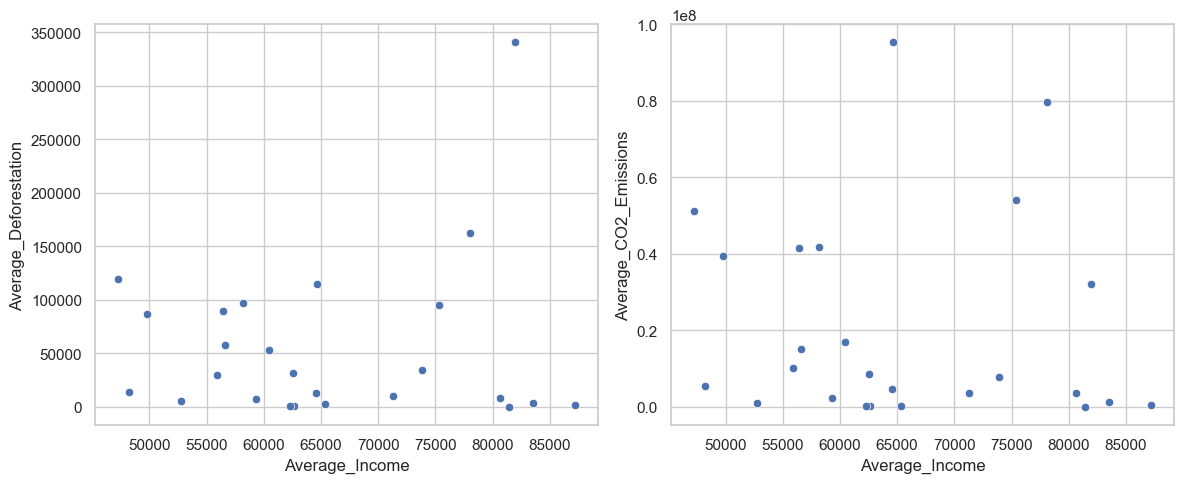

                       Average_Income  Average_Deforestation  \
Average_Income               1.000000               0.107569   
Average_Deforestation        0.107569               1.000000   
Average_CO2_Emissions       -0.079569               0.649356   

                       Average_CO2_Emissions  
Average_Income                     -0.079569  
Average_Deforestation               0.649356  
Average_CO2_Emissions               1.000000  


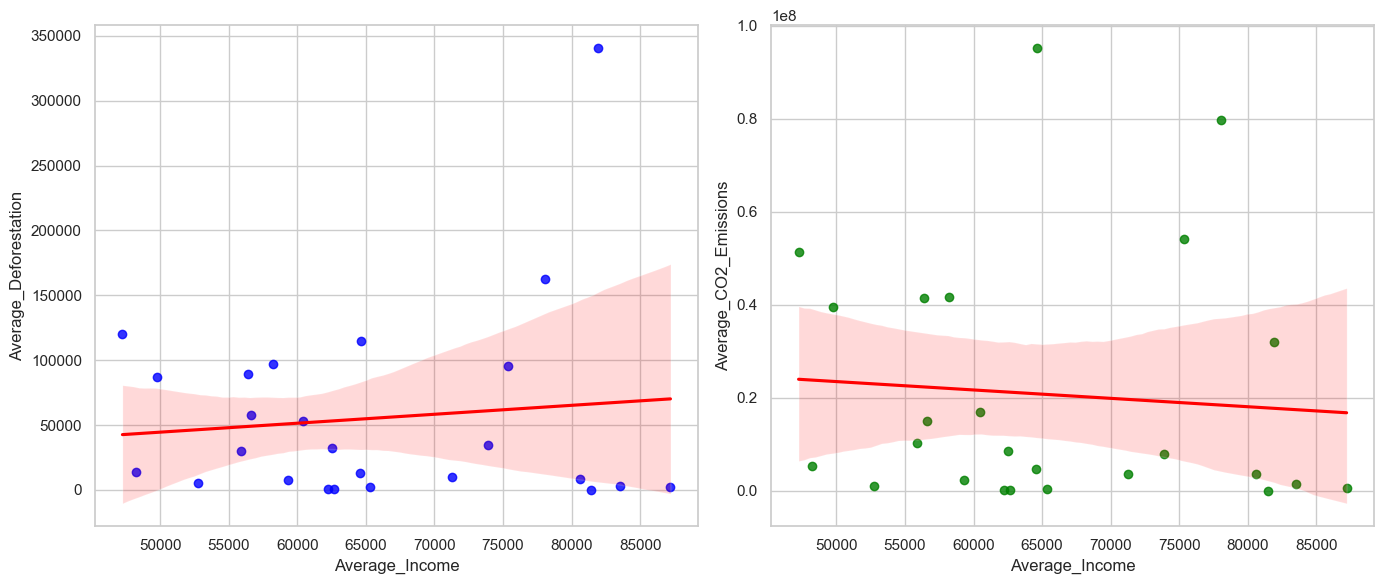

                              OLS Regression Results                             
Dep. Variable:     Average_Deforestation   R-squared:                       0.012
Model:                               OLS   Adj. R-squared:                 -0.031
Method:                    Least Squares   F-statistic:                    0.2692
Date:                   Tue, 14 Jan 2025   Prob (F-statistic):              0.609
Time:                           14:25:24   Log-Likelihood:                -315.70
No. Observations:                     25   AIC:                             635.4
Df Residuals:                         23   BIC:                             637.8
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const         

In [ ]:
data = df.copy()

# Calculate average values for median household income, deforestation, and CO₂ emissions
data['Average_Income'] = data[[str(year) for year in range(1990, 2022) if str(year) in data.columns]].mean(axis=1)
data['Average_Deforestation'] = data[['tc_loss_ha_' + str(year) for year in range(2005, 2022) if 'tc_loss_ha_' + str(year) in data.columns]].mean(axis=1)
data['Average_CO2_Emissions'] = data[['gfw_forest_carbon_gross_emissions_' + str(year) 
                                      + '__Mg_CO2e' for year in range(2005, 2022) if 'gfw_forest_carbon_gross_emissions_' + str(year) 
                                      + '__Mg_CO2e' in data.columns]].mean(axis=1)

# Aggregate data by state
state_data = data.groupby('State').agg({
    'Average_Income': 'mean',
    'Average_Deforestation': 'mean',
    'Average_CO2_Emissions': 'mean'
}).reset_index()

# Plot histograms and scatter plots for EDA
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(state_data['Average_Income'], bins=20, kde=True, ax=axes[0])
sns.histplot(state_data['Average_Deforestation'], bins=20, kde=True, ax=axes[1])
sns.histplot(state_data['Average_CO2_Emissions'], bins=20, kde=True, ax=axes[2])
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x='Average_Income', y='Average_Deforestation', data=state_data, ax=axes[0])
sns.scatterplot(x='Average_Income', y='Average_CO2_Emissions', data=state_data, ax=axes[1])
plt.tight_layout()
plt.show()

# Perform correlation analysis
correlation_matrix = state_data[['Average_Income', 'Average_Deforestation', 'Average_CO2_Emissions']].corr()
print(correlation_matrix)

# Prepare data for regression analysis
X = sm.add_constant(state_data['Average_Income'])
Y_deforestation = state_data['Average_Deforestation']
Y_emissions = state_data['Average_CO2_Emissions']

# Regression models
model_deforestation = sm.OLS(Y_deforestation, X).fit()
model_emissions = sm.OLS(Y_emissions, X).fit()

# Plot regression lines
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.regplot(x='Average_Income', y='Average_Deforestation', data=state_data, ax=axes[0], color='blue', line_kws={'color': 'red'})
sns.regplot(x='Average_Income', y='Average_CO2_Emissions', data=state_data, ax=axes[1], color='green', line_kws={'color': 'red'})
plt.tight_layout()
plt.show()

# Print regression summaries
print(model_deforestation.summary())
print(model_emissions.summary())


Your regression analysis results indicate several important statistical insights about the relationship between average income and average deforestation:

### Summary
- **Dependent Variable**: Average Deforestation
- **R-squared**: 0.012
  - This value suggests that the model explains only about 1.2% of the variance in deforestation, which is very low. It indicates that average income is not a good predictor of deforestation in this dataset.
- **Adjusted R-squared**: -0.031
  - The negative value here further reinforces the notion that the model is not suitable for predicting deforestation based on the given data.
- **F-statistic** and **Prob (F-statistic)**: 0.2692 and 0.609, respectively
  - The F-statistic is quite low, and the corresponding p-value is much higher than 0.05, indicating that the model is not statistically significant.
- **Coefficients**:
  - **Intercept (const)**: \(1.004 \times 10^4\) with a very high standard error, suggesting a lot of uncertainty about the intercept estimate.
  - **Average_Income Coefficient**: 0.6894 with a p-value of 0.609, indicating that changes in average income are not statistically significantly associated with changes in deforestation.

### Statistical Analysis
- **Omnibus/Prob(Omnibus)**: The test statistic is significant, indicating the residuals are not normally distributed.
- **Jarque-Bera (JB)/Prob(JB)**: This test also indicates that the residuals do not follow a normal distribution.
- **Durbin-Watson**: The statistic is 1.132, suggesting a low to moderate level of autocorrelation in the residuals.
- **Condition Number**: 3.83e+05, indicating potential multicollinearity or numerical instability in the model.

### Interpretation and Reflections
Given the very low R-squared and the lack of statistical significance of the model, it is likely that additional variables and possibly more complex models are needed to effectively model deforestation. The diagnostic tests also suggest issues with the distribution of residuals and potential multicollinearity, which could be further investigated by:
- **Adding More Variables**: Include other socio-economic, environmental, or policy-related factors that might affect deforestation.
- **Transforming Variables**: Try transforming the variables (e.g., using logarithmic scales) to improve model fit and handle skewness in data.
- **Checking Multicollinearity**: Use VIF (Variance Inflation Factor) to check for multicollinearity among the predictors.
- **Alternative Models**: Considering nonlinear models or machine learning methods might provide better insights if the relationships in the data are not linear.

These steps can help refine your analysis and potentially reveal more about the factors influencing deforestation. If you need further assistance with any specific analysis or steps, feel free to ask!